# Planting just one tree: Creating an environmentally sustainable smart IoT city using Azure compute services with Uber, and showing the best place to plant Reply's one tree

    Conor McMullan
    Alex Krajewski
    James Petley
    Irina Gubaciova

## Introduction

We've already shown how a simple neural network trained on Azure can predict the usage requirements of one home based on historical data. What started as a simple thought experiment in extending this idea further turned into a full side project- whilst we present no code or script within this notebook, we show (if nothing else) a new and interesting approach to optimising environmental urban planning using distributed swarm AI.

As human population grows at a relentless exponential rate, we face a climate crisis with more complex roots than ever before. Meeting the needs of the growing population often requires ecological sacrifice and compromise that should not have to be made. We show that, using modern AI techniques, we can minimise the impact of the growing urban world on the natural world by making informed decisions from data. We utilise a swarm AI technique to model components of an IoT network as workers that need to be optimised, and use deep learning to optimise said workers.

## Variational Autoencoders and Automatic Information Generation

If we optimised the way a worker approaches a problem (such as how a traffic light distribues vehicles through a junction) simply through random search, we would be adding nothing to the research effort in this area. To add something to this field, we need fast and accurate methods to build an ideal individual worker for a specific problem. Surprisingly, we found a way of doing this by building upon deepfake technology.

<img src="https://miro.medium.com/max/1815/1*UdOybs9wOe3zW8vDAfj9VA@2x.png">

Since 2018, the fastest developing field of machine learning is *unsupervised learning*. Unsupervised learning (or data mining) extracts key features from input data and reveals trends that previously weren't obvious. We can train a pair of 'normal' supervised networks to encode data in a fast and effective way: an *autoencoder*. Autoencoders downsample an input, decode it, backpropagate the error between the original and encoded-decoded data and ultimately form a fast but very effective unsupervised data extraction method.

<img src="https://miro.medium.com/max/721/1*-i8cp3ry4XS-05OWPAJLPg.png" height='400' width='400'>

Above is a typical autoencoder output, in this case for images of handwritten digits. If we wanted to pick a 7, we'd know to look in the purple space. But what if we wanted to generate some new data, something we haven't seen before? With this output, we could only pick a defined (coloured) point. First developed by DeepMind for use in deepfake generation, variational autoencoders come to the rescue.

<img src="https://miro.medium.com/max/1266/1*79AzftDm7WcQ9OfRH5Y-6g@2x.png" height='600' width='600'>

Variational autoencoders express each input as a probability, not an absolute value. This gives a continuous space in which we can pluck any point, decode it, and get data that looks like a regular input that came from the real world. Simply by calculating a mean and standard deviation from each downsampled piece of data, we can produce clouds of information, not points. We select two random points from this cloud. After giving it to an MLP, we calculate the success of each point and go along the direction of greater success (from less successful to more successful). 

MLPs, or multi-layer perceptrons, are shallow and simple neural networks. Often containing no more than two hidden layers, this family of neural networks is perfect for simple tasks that need to be done quickly. In this case, we train an MLP to assign a point in encoded space a success (like the one defined earlier with the success function). This makes a statistical judgement as to how well these parameters will perform if injected into a real scenario, and is the secret sauce to optimising an individual worker's performance.

## Using Autoencoded Space to sample Optimised values

In autoencoded space, there are optimum values to be found just like in normal space. A specific example of this is encoding a sports player's chance of sustaining injury during play. We can learn what types of movement increase the probability of injury using autoencoded space, and thus find an optimum playstyle using a similar technique.

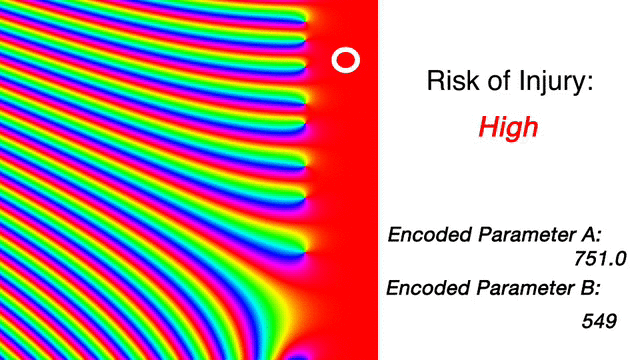

Playing the hypothetical scenario that we have lots of training data concerning player injury data, we can encode this related information into two parameters (let's call them A and B). We train a simple neural network to classify any move a player makes as a risk of injury- red being high, green being low and all colours in between fitting somewhere in the middle. Once we have our classifier built from data we know, we can begin to sample new data from the VAE to estimate a solution or 'play' with minimal risk (in the green). 

Using the Navier-Stokes and Electrostatic Attraction Equations, we can combine them to describe the movement of an incompressible electrically charged fluid within an electric force field:

<center>$ \huge{\rho \frac{\delta u}{\delta t} = -\nabla p + \mu \nabla^2 u + \rho \frac{q_{particle}}{r^2}} $</center>

A key, but so far missing, component of swarm AI is the ability to know when to hold 'em and when to fold 'em. In other words, how can you tell when it's effective to help another worker out? How do you know when to stop? How can you tell what problems are easy enough that a worker will get over it before another gets there, and which are going to need additional help?

Let's consider this electric fluid to be the large magenta circle, and the smaller yellow circle is a constant electric charge. This charge orbits the fluid at a constant radius.

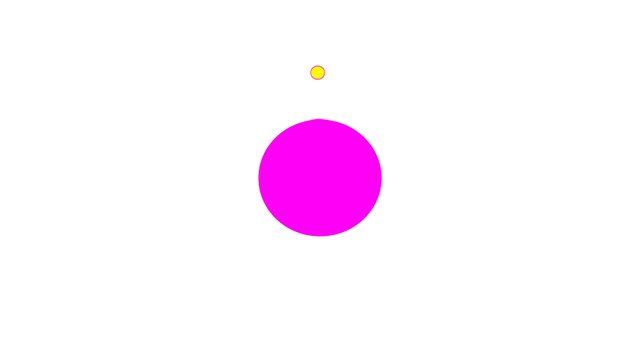

If we model the orbit of the charge this way, we can meaningfully analyse the performance of a worker through the success function. Let the speed of the charge's orbit be proportional to the success function at any time. When the orbit speed of the charge slows, the fluid is more attracted to that area. When it speeds up, the fluid moves less. This is a visual and mathematical of describing a set of high-level rules to a machine in a low-level way. The fluid is deformed to produce a richly informative shape with multiple derivatives. The key to making swarm AI work later on (when upscaling to 3D and thus more workers) is that this shape has a first and second derivative at every point.

Let's look at the new shape produced by this process, relative to the original circle:

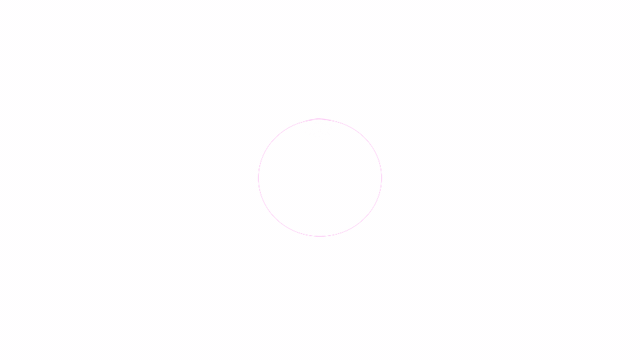

We can see certain areas are performing very well (especially near the top) and the bottom sector of the circle isn't doing as well. Using this method, we can analyse specific weaknesses in strategy as well as generally analyse difficult points within a problem itself. By finding the first derivative at every point on this circle, we can describe numerically to a machine what's working and what isn't. Further, we can actually show *when* a worker's proposed solution begin to fail (as the derivative is the rate of change) and when things start improving.

Outside of swarm AI, we can actually use this as a form of intuitive analysis. By logging every IoT device within a network as a worker that's measuring emissions, we can see not only what parts of a city are heavy-handed with emissions, but also show how regular this occurance is and associate external circumstances as either fluke or consistant events.

Uber provide an amazing traffic dataset for some of the most active cities in the Western Hemisphere. Let's look at their traffic heatmap of San Francisco.

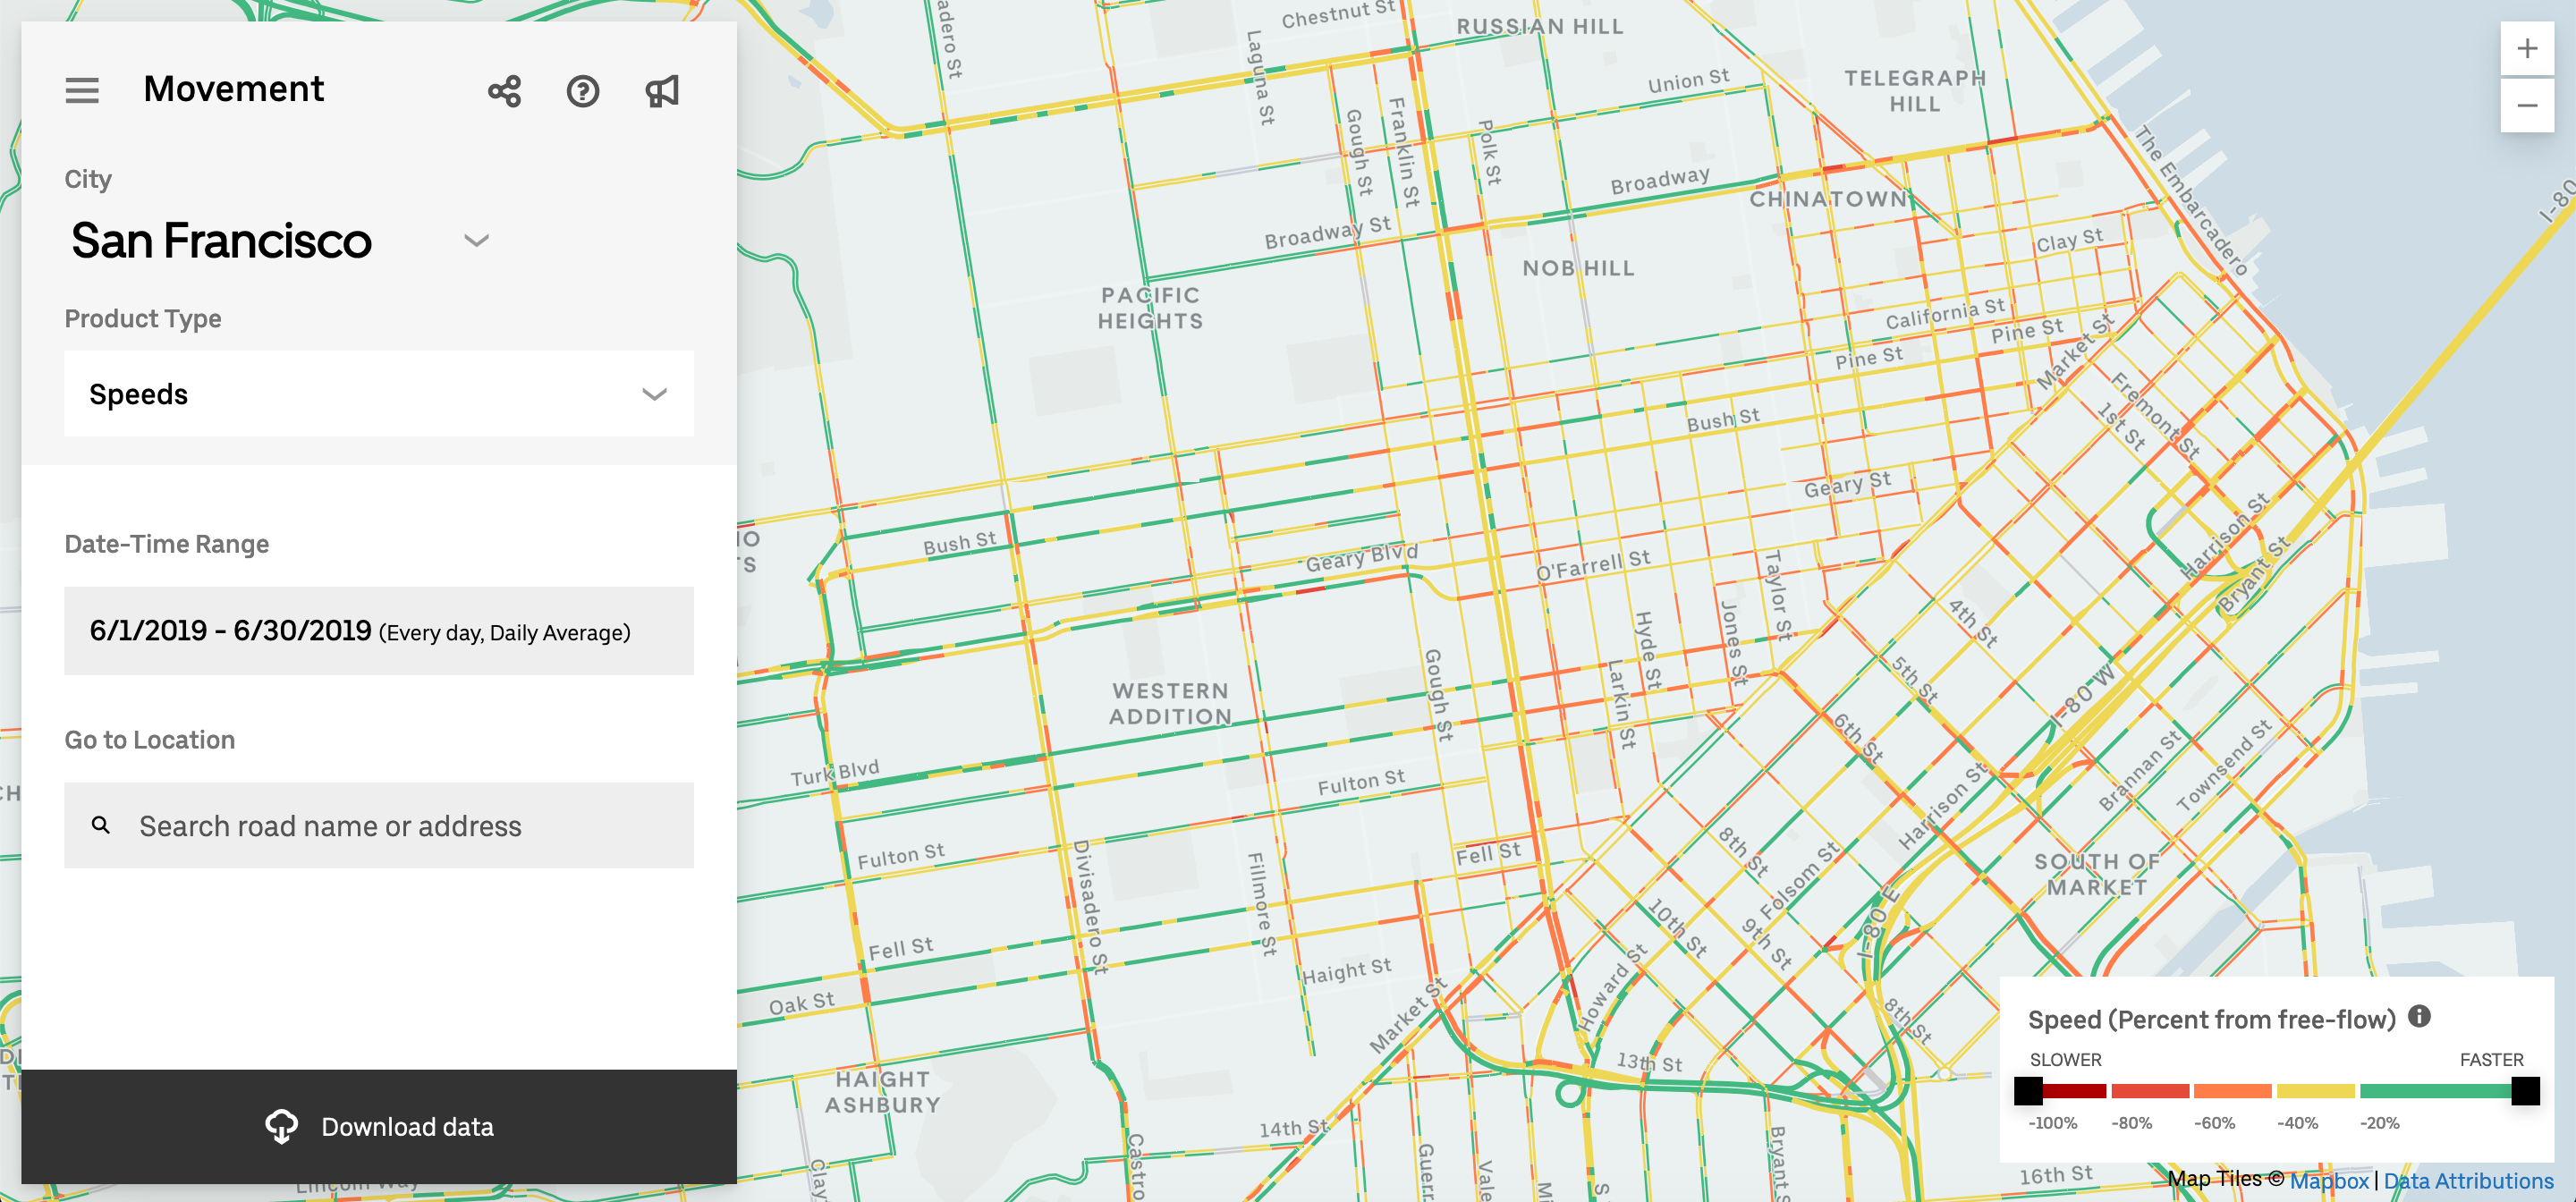

Within this simple heatmap we can extract an extraordinary amount of data. Let's say that every vehicle on the road is the same, and emits the same amount of *CO2* per second, per hour, per day. This heatmap then becomes a pollution map of the city, at least at a naive level. Let's combine this with some data from San Francisco's City and County District telling us about the distribution of tree life within the city:

<img src="https://cdn5.starkinsider.com/wordpress/wp-content/uploads/2010/04/Urban-Forest-Map-San-Francisco.jpg">

Using the large IoT devices given by Uber, we can see how pollution diffuses across the city. Vehicles give out pollutants but move, trees absorb them but remain static and thus some areas of the city are hit significantly worse than others.

Reply promise to plant one tree at the end of HackCambridge. 
<br>
If we could only plant one tree, where would be the best place to put it in San Francisco?

Let us say, hypothetically, we used Uber's massive dataset to train a neural network that could predict traffic flow across San Francisco on any given day, in a similar way to how we predict the use of a household appliance on any given day. Let us say we have this perfect neural network that tells us exactly where a vehicle will be at any time.

<center>$ \huge{\rho \frac{\delta u}{\delta t} = -\nabla p + \mu \nabla^2 u + \rho \Sigma{\frac{1}{r^2}}, r \epsilon distance\space from \space a \space tree, \nabla p = traffic\space gradient} $</center>

By modelling the two datasets as a vector field with flow, we can see quite quickly the points where the trees can handle the pollutants and where they are overwhelmed. Specifically, we can see the best and worst points in the city (at least naively) for air quality. 

The problem with using a differential equations is that they deal with infinitely small points, which are somewhat impractical. However, variational autoencoders come to the rescue. By encoding multiple variables, like congestion, location, time of day, tree locality, and so on, and training an MLP to assign an emission value to this real data, we can sample across our VAE of imaginary data to pull an optimum encoded value. This is obviously a complex and deep technique not achieveable over 24 hours, but as a team we look forward to investigating it further.

This is little more than a creative stream of conscience, but we hope you've enjoyed reading this notebook. Our submissions act as some kind of proof of concept, and we would be excited to extend these ideas in the future.